# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

telecom_users = pd.read_csv('telecom_users.csv', index_col=0) # Загружаем файл, устанавливаем индексы на столбец 0
telecom_users.head() # Выводим первые 5 строк

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [86]:
telecom_users.shape # выводим размер таблицы

(5986, 21)

In [87]:
telecom_users.isnull().sum() # смотрим пропущенные значения

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [88]:
telecom_users.describe() # выводим описательные статистики

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


# 2. Исследование зависимостей и формулирование гипотез

In [89]:
telecom_users['Churn'].loc[telecom_users['Churn'] == 'No'] = 0 # Помечаем пользователей которые остались цифрой 0
telecom_users['Churn'].loc[telecom_users['Churn'] == 'Yes'] = 1 # Помечаем пользователей по которым произошол отток цифрой 1

In [90]:
telecom_users['MonthlyCharges'].value_counts() # Смотрим самое часто встечающиеся значение среди месячного размера оплаты

20.05    50
19.85    40
19.70    39
19.55    37
19.95    36
         ..
83.45     1
65.90     1
87.05     1
18.55     1
51.65     1
Name: MonthlyCharges, Length: 1526, dtype: int64

In [ ]:
telecom_users[telecom_users['MonthlyCharges'] == 20.05] # посмотрим поближе на самое часто встречающееся значение
# Тут сразу бросается в глаза, что почти все пользователи из этой подвыборки остались и они все не имеют подключения к интернету

In [92]:
telecom_users[telecom_users['InternetService'] != 'No']['Churn'].sum() #  Посмотрим на кол-во пользователей у которых подключен интернет и по ним произошел отток

1488

In [93]:
telecom_users['Churn'].sum() # посмотрим общее кол-во пользователей по которым произошел отток

1587

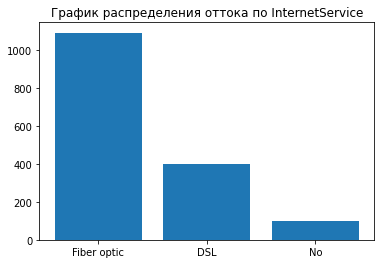

In [112]:
churn = telecom_users[telecom_users['Churn'] == 1].groupby(['InternetService'])['Churn'].count()
churn = churn.sort_values(ascending=False)
plt.bar(churn.index, churn.values) # Посмотрим на гистограмму распределения оттока по колонке InternetService
plt.title('График распределения оттока по InternetService')
plt.show()
# На графике видно, что преимущественно уходят именно пользователи подключенные к интернету

На данном этапе можно сделать вывод, что у компании очень плохой интернет и пользователи практически в 100 процентах случаем уходят именно из-за него

Давайте попробуем рассмотреть ситуацию поподробней. В чем именно состоит проблема?

In [113]:
# Сделаем подвыборку бинарных признаков связанных с интернетом
outflow = telecom_users[telecom_users['Churn'] == 1][['OnlineSecurity', 'OnlineBackup',
                                                      'DeviceProtection', 'TechSupport',
                                                      'StreamingTV', 'StreamingMovies',
                                                      'PaperlessBilling', 'Churn']]
outflow.head(3)

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
6344,No,No,No,No,No,No,Yes,1
4653,No,No,No,Yes,Yes,Yes,No,1
6508,No,No,No,No,Yes,Yes,Yes,1


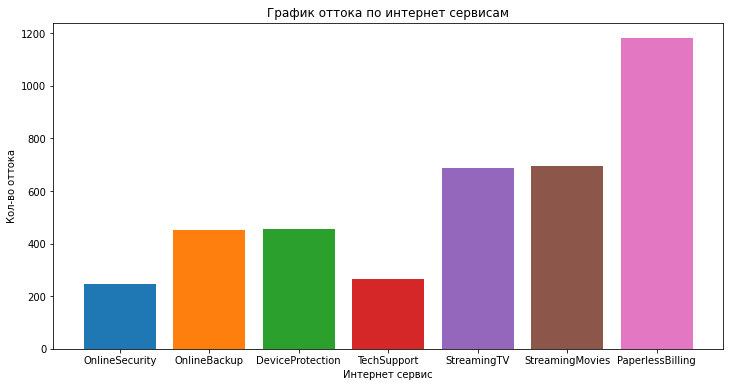

In [114]:
# Пройдемся по этим признакам циклом для вывода колличества пользователей пользующихся этим сервисом и по которым был отток
# Построим график оттока по этим признакам
f, ax = plt.subplots(figsize=(12,6))
for i in outflow.columns[0:-1]:
  outflow_service = outflow[outflow[i] == 'Yes']['Churn'].count()
  ax.bar(i, outflow_service)

ax.set_title('График оттока по интернет сервисам')
ax.set_xlabel('Интернет сервис')
ax.set_ylabel('Кол-во оттока')
plt.show()

Можно сделать вывод, что на отток в большенстве своем влияют 3 признака: StreamingTV, StreamingMovies, PaperlessBilling

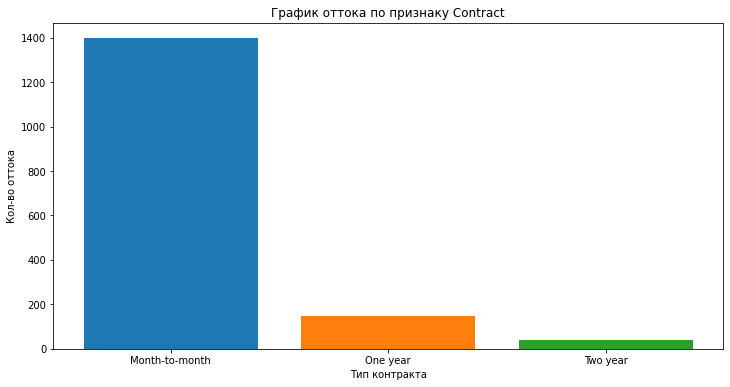

In [115]:
# Проверим влияние признака Contract на отток пользователей и построим график
f, ax = plt.subplots(figsize=(12,6))

for i in ['Month-to-month', 'One year', 'Two year']:
  outflow_contract = telecom_users[(telecom_users['Churn'] == 1) & (telecom_users['Contract'] == i)]['Churn'].count()
  ax.bar(i, outflow_contract)

ax.set_title('График оттока по признаку Contract')
ax.set_xlabel('Тип контракта')
ax.set_ylabel('Кол-во оттока')
plt.show()

Из графика видно, что тут все вполне логично, пользователей с типом контракта Month-to-month уходит значительно больше потому, что тип контракта One year и Two year предусматривают оплату на год и два вперед. С помесячной оплатой пользователю гораздо легче уйти.

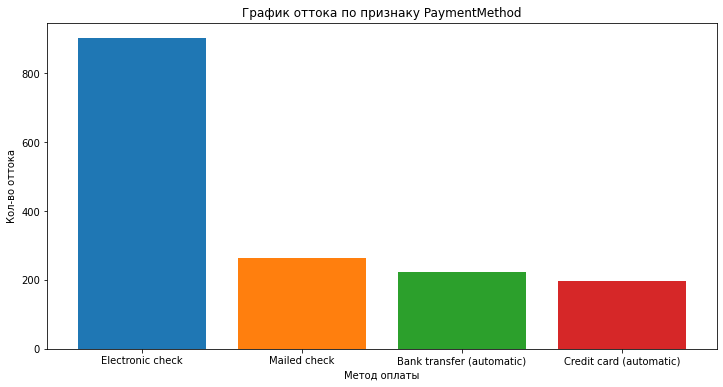

In [116]:
# Теперь проанализируем методы оплаты относительно оттока пользователей и построим график
f, ax = plt.subplots(figsize=(12,6))

for i in ['Electronic check', 'Mailed check',
          'Bank transfer (automatic)', 'Credit card (automatic)']:
  outflow_pay = telecom_users[(telecom_users['Churn'] == 1) & (telecom_users['PaymentMethod'] == i)]['Churn'].count()
  ax.bar(i, outflow_pay)

ax.set_title('График оттока по признаку PaymentMethod')
ax.set_ylabel('Кол-во оттока')
ax.set_xlabel('Метод оплаты')
plt.show()

Тут мы видим, что преимущественно уходят пользователи с методом оплаты Electronic check

Далее проанализируем оставшиеся категориальные признаки

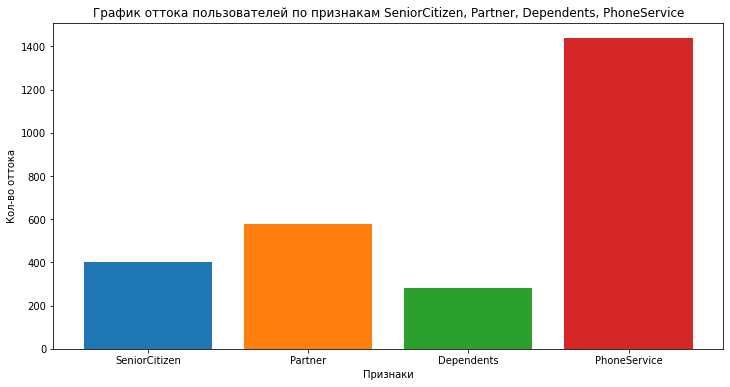

In [117]:
# Теперь проанализируем остальные бинарные признаки относительно оттока и построим график
# Для начала преобразуем признак SeniorCitizen в вид Yes/No для более удобной итерации
telecom_users['SeniorCitizen'].loc[telecom_users['SeniorCitizen'] == 0] = 'No'
telecom_users['SeniorCitizen'].loc[telecom_users['SeniorCitizen'] == 1] = 'Yes'

f, ax = plt.subplots(figsize=(12,6))

for i in ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService']:
  outflow_other = telecom_users[(telecom_users['Churn'] == 1) & (telecom_users[i] == 'Yes')]['Churn'].count()
  ax.bar(i, outflow_other)

ax.set_title('График оттока пользователей по признакам SeniorCitizen, Partner, Dependents, PhoneService')
ax.set_ylabel('Кол-во оттока')
ax.set_xlabel('Признаки')
plt.show()

Теперь посмотрим на эти же признаки в подвыбоке тех пользователей которые остались

In [118]:
# Создаем подвыборку пользователей которые остались
no_outflow = telecom_users[telecom_users['Churn'] == 0]
no_outflow.shape

(4399, 21)

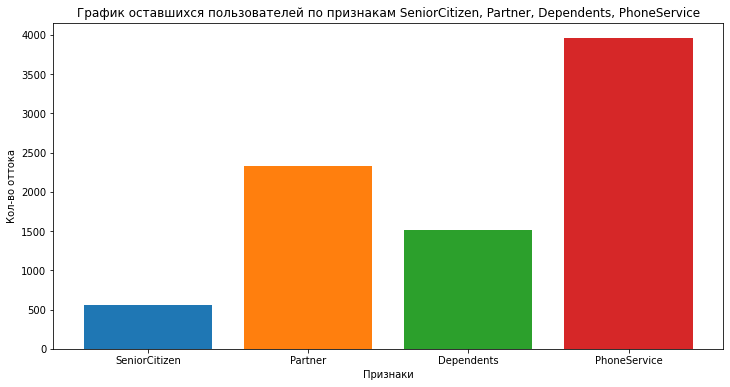

In [119]:
# Построим график
f, ax = plt.subplots(figsize=(12,6))

for i in ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService']:
  outflow_other = telecom_users[(telecom_users['Churn'] == 0) & (telecom_users[i] == 'Yes')]['Churn'].count()
  ax.bar(i, outflow_other)

ax.set_title('График оставшихся пользователей по признакам SeniorCitizen, Partner, Dependents, PhoneService')
ax.set_ylabel('Кол-во оттока')
ax.set_xlabel('Признаки')
plt.show()

In [120]:
# Проверим влияние гендера на отток
telecom_users[telecom_users['Churn'] == 1].groupby('gender')['Churn'].count()

gender
Female    791
Male      796
Name: Churn, dtype: int64

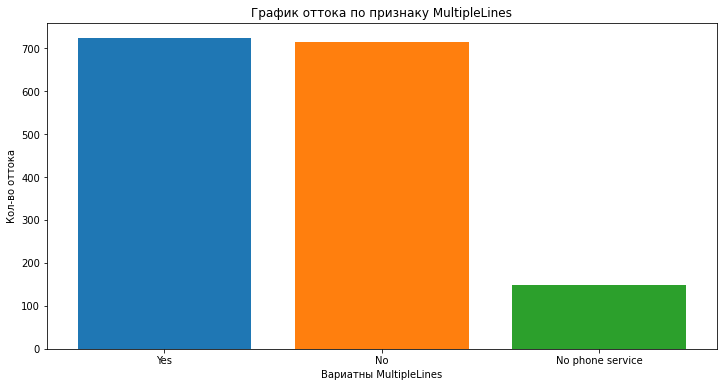

In [121]:
# Посмотрим поближе на признак MultipleLines относительно оттока
f, ax = plt.subplots(figsize=(12,6))

for i in ['Yes', 'No', 'No phone service']:
  multi_lines = telecom_users[(telecom_users['Churn'] == 1) & (telecom_users['MultipleLines'] == i)]['Churn'].count()
  ax.bar(i, multi_lines)

ax.set_title('График оттока по признаку MultipleLines')
ax.set_ylabel('Кол-во оттока')
ax.set_xlabel('Вариатны MultipleLines')
plt.show()

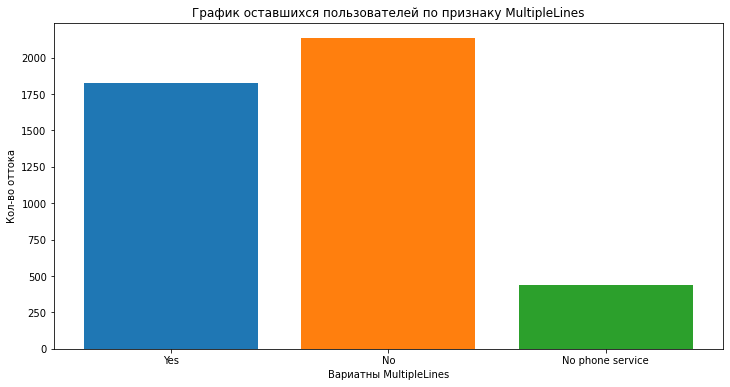

In [122]:
# Посмотрим поближе на признак MultipleLines относительно оставшихся пользователей
f, ax = plt.subplots(figsize=(12,6))

for i in ['Yes', 'No', 'No phone service']:
  multi_lines = telecom_users[(telecom_users['Churn'] == 0) & (telecom_users['MultipleLines'] == i)]['Churn'].count()
  ax.bar(i, multi_lines)

ax.set_title('График оставшихся пользователей по признаку MultipleLines')
ax.set_ylabel('Кол-во оттока')
ax.set_xlabel('Вариатны MultipleLines')
plt.show()

По этим графикам можно сделать вывод, что признаки MultipleLines, gender, SeniorCitizen, Partner, Dependents, PhoneService, customerID не несут в себе какой-либо пользы для прогнозирования оттока пользователей

In [123]:
#Удаляем неинформативные признаки
telecom_users = telecom_users.drop(columns=['MultipleLines', 'gender', 'SeniorCitizen',
                                            'Partner', 'Dependents', 'PhoneService', 'customerID'])
telecom_users.head(3)

,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,72,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,0
4528,44,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,0
6344,38,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,1


Теперь следует проанализировать числовые признаки.

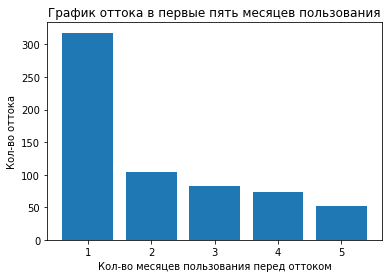

In [124]:
# Посмотрим после скольки месяцев пользования пользователи уходят
counts_tenure = telecom_users[telecom_users['Churn'] == 1]['tenure'].value_counts().head(5)
plt.bar(counts_tenure.index, counts_tenure.values)
plt.title('График оттока в первые пять месяцев пользования')
plt.ylabel('Кол-во оттока')
plt.xlabel('Кол-во месяцев пользования перед оттоком')
plt.show()

На графике ясно видно, что более 300 пользователей отваливаются в первый месяц пользования услугами компании.

In [125]:
# Преобразуем тип признака MonthlyCharges c str на float64
telecom_users[pd.to_numeric(telecom_users['TotalCharges'], errors='coerce').isnull()] = 0
telecom_users['TotalCharges'] = pd.to_numeric(telecom_users['TotalCharges'])
type(telecom_users['TotalCharges'][0])
# Из-за того, что есть несколько пользователей у которых в признаке tenure стоит 0
# то и в признаке TotalCharges было проставлена пустая строка, мы заменили её на 0

numpy.float64

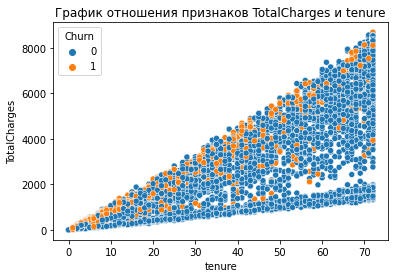

In [126]:
# Построим график отношения общей суммы потраченой пользователем к кол-ву месяцев пользования
sns.scatterplot(telecom_users['tenure'], telecom_users['TotalCharges'], hue=telecom_users['Churn'])
plt.title('График отношения признаков TotalCharges и tenure')
plt.show()

На графике не видно никакой зависимости между признаками и оттоком

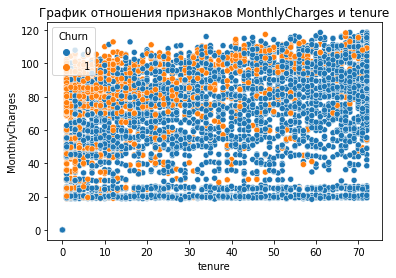

In [127]:
# Построим график отношения ежемесячной оплаты к кол-ву месяцев пользования
sns.scatterplot(telecom_users['tenure'], telecom_users['MonthlyCharges'], hue=telecom_users['Churn'])
plt.title('График отношения признаков MonthlyCharges и tenure')
plt.show()

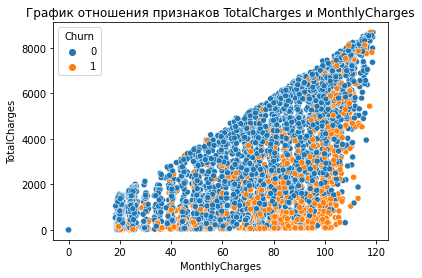

In [128]:
# Построим график отношения общей суммы потраченой пользователем к ежемесячной оплате
sns.scatterplot(telecom_users['MonthlyCharges'], telecom_users['TotalCharges'], hue=telecom_users['Churn'])
plt.title('График отношения признаков TotalCharges и MonthlyCharges')
plt.show()

На этих графиках можно заметить скопление ушедших пользователей в районе признака MonthlyCharges около 80-100 и с малым кол-вом месяцев пользования и низкой общей потраченной суммой. Это говорит нам о том, что пользователи в основном уходят в первые 10 месяцев пользования и этих людей объединят то, что они тратят около 80-100 долларов в месяц. Возможно имеет место проработать какие-то акции для новых пользователей.

# 3. Построение моделей для прогнозирования оттока

Перед тем как начать построение модели нам необходимо перевести все категориальные признаки в числовые.

In [129]:
telecom_users['InternetService'].loc[telecom_users['InternetService'] == 'No'] = 0 
telecom_users['InternetService'].loc[telecom_users['InternetService'] == 'Fiber optic'] = 1
telecom_users['InternetService'].loc[telecom_users['InternetService'] == 'DSL'] = 2

telecom_users['OnlineSecurity'].loc[telecom_users['OnlineSecurity'] == 'No'] = 0 
telecom_users['OnlineSecurity'].loc[telecom_users['OnlineSecurity'] == 'Yes'] = 1
telecom_users['OnlineSecurity'].loc[telecom_users['OnlineSecurity'] == 'No internet service'] = 2

telecom_users['OnlineBackup'].loc[telecom_users['OnlineBackup'] == 'No'] = 0 
telecom_users['OnlineBackup'].loc[telecom_users['OnlineBackup'] == 'Yes'] = 1
telecom_users['OnlineBackup'].loc[telecom_users['OnlineBackup'] == 'No internet service'] = 2

telecom_users['DeviceProtection'].loc[telecom_users['DeviceProtection'] == 'No'] = 0 
telecom_users['DeviceProtection'].loc[telecom_users['DeviceProtection'] == 'Yes'] = 1
telecom_users['DeviceProtection'].loc[telecom_users['DeviceProtection'] == 'No internet service'] = 2

telecom_users['TechSupport'].loc[telecom_users['TechSupport'] == 'No'] = 0 
telecom_users['TechSupport'].loc[telecom_users['TechSupport'] == 'Yes'] = 1
telecom_users['TechSupport'].loc[telecom_users['TechSupport'] == 'No internet service'] = 2

telecom_users['StreamingTV'].loc[telecom_users['StreamingTV'] == 'No'] = 0 
telecom_users['StreamingTV'].loc[telecom_users['StreamingTV'] == 'Yes'] = 1
telecom_users['StreamingTV'].loc[telecom_users['StreamingTV'] == 'No internet service'] = 2

telecom_users['StreamingMovies'].loc[telecom_users['StreamingMovies'] == 'No'] = 0 
telecom_users['StreamingMovies'].loc[telecom_users['StreamingMovies'] == 'Yes'] = 1
telecom_users['StreamingMovies'].loc[telecom_users['StreamingMovies'] == 'No internet service'] = 2

telecom_users['Contract'].loc[telecom_users['Contract'] == 'Month-to-month'] = 0 
telecom_users['Contract'].loc[telecom_users['Contract'] == 'One year'] = 1
telecom_users['Contract'].loc[telecom_users['Contract'] == 'Two year'] = 2

telecom_users['PaperlessBilling'].loc[telecom_users['PaperlessBilling'] == 'No'] = 0 
telecom_users['PaperlessBilling'].loc[telecom_users['PaperlessBilling'] == 'Yes'] = 1

telecom_users['PaymentMethod'].loc[telecom_users['PaymentMethod'] == 'Electronic check'] = 0 
telecom_users['PaymentMethod'].loc[telecom_users['PaymentMethod'] == 'Mailed check'] = 1
telecom_users['PaymentMethod'].loc[telecom_users['PaymentMethod'] == 'Bank transfer (automatic)'] = 2
telecom_users['PaymentMethod'].loc[telecom_users['PaymentMethod'] == 'Credit card (automatic)'] = 3

Теперь необходимо все признаки перевести в тип int или foat

In [134]:
column_list = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
               'PaperlessBilling', 'PaymentMethod', 'Churn']
for i in column_list:
  telecom_users[i] = pd.to_numeric(telecom_users[i])

telecom_users.dtypes

tenure                int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [141]:
# разделим наши данные на признаки и целевую переменную
X = telecom_users.drop(columns='Churn', axis=1)
y = telecom_users.Churn
# переводим целевую переменную к типу int
y = y.astype('int')

In [137]:
# Теперь разделим наши данные train и test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=17)

Предсказание оттока клиента является задачей бинарной классификации, а поскольку в наших данных много категориальных признаков, то воспользуемся алгоритмами на основе деревьев решений, логистическую регрессию и гаусовский наивный байес. Будем использовать самые распространеные метрики качества для оценки моделей accuracy и roc_auc.

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Создаем объекты обучающих алгоритмов
lr = LogisticRegression(random_state=17)
dtc = DecisionTreeClassifier(random_state=17)
gnb = GaussianNB()
rfc = RandomForestClassifier(random_state=17)
gbc = GradientBoostingClassifier(random_state=17)

# Создаем список моделей и списки для хранения метрик качества
models = [lr, dtc, gnb, rfc, gbc]
roc_auc_scores = []
accuracy_scores = []

# Обучаем, тестируем и выводим метрики качества в цикле
for model in models:
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  score = roc_auc_score(y_test, predicted)
  accuracy = accuracy_score(y_test, predicted)
  roc_auc_scores.append(score.round(3))
  accuracy_scores.append(accuracy.round(3))
  print(f'Accuracy {model}: {accuracy.round(3)}')
  print(f'ROC_AUC {model}: {score.round(3)}')
  print('\n')

Accuracy LogisticRegression(random_state=17): 0.799
ROC_AUC LogisticRegression(random_state=17): 0.693


Accuracy DecisionTreeClassifier(random_state=17): 0.724
ROC_AUC DecisionTreeClassifier(random_state=17): 0.643


Accuracy GaussianNB(): 0.699
ROC_AUC GaussianNB(): 0.733


Accuracy RandomForestClassifier(random_state=17): 0.784
ROC_AUC RandomForestClassifier(random_state=17): 0.685


Accuracy GradientBoostingClassifier(random_state=17): 0.811
ROC_AUC GradientBoostingClassifier(random_state=17): 0.717




# 4. Сравнение качества моделей 

Для более наглядного сравнения моделей построим графики метрик относительно используемых алгоритмов.

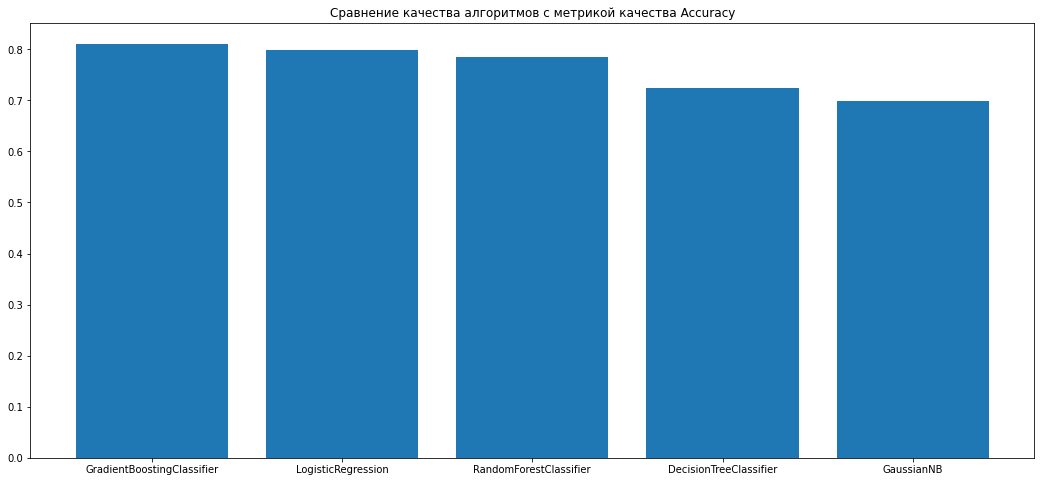

In [139]:
# Создаем список с именами моделей
models_name = ['LogisticRegression', 'DecisionTreeClassifier', 'GaussianNB',
               'RandomForestClassifier', 'GradientBoostingClassifier']

# Создаем объект Series с именами алгоритмов и их оценками accuracy
model_accuracy_scores = pd.Series(accuracy_scores, index=models_name)
model_accuracy_scores = model_accuracy_scores.sort_values(ascending=False)
# Строим barplot
f, ax = plt.subplots(figsize=(18,8))
ax.bar(model_accuracy_scores.index, model_accuracy_scores.values)
ax.set_title('Сравнение качества алгоритмов с метрикой качества Accuracy')
plt.show()

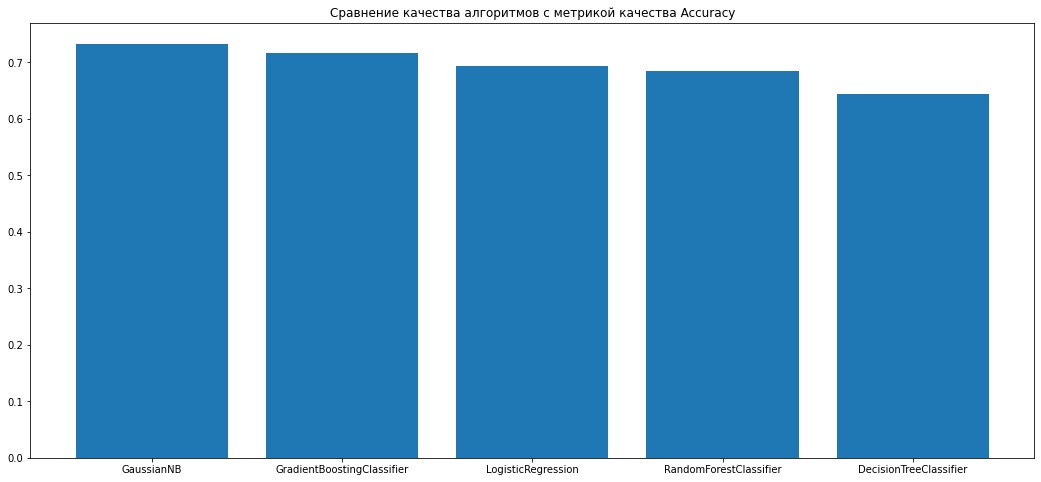

In [140]:
# Создаем объект Series с именами алгоритмов и их оценками roc_auc
model_roc_auc_scores = pd.Series(roc_auc_scores, index=models_name)
model_roc_auc_scores = model_roc_auc_scores.sort_values(ascending=False)
# Строим barplot
f, ax = plt.subplots(figsize=(18,8))
ax.bar(model_roc_auc_scores.index, model_roc_auc_scores.values)
ax.set_title('Сравнение качества алгоритмов с метрикой качества Accuracy')
plt.show()

На первом графике видно, что лучшими алгоритмоми с точки зрения метрики accuracy являются GradientBoosting и LogisticRegression, а вот по метрике roc_auc лучшими будут GaussianNB и GradientBoosting. Из этого можно сделать вывод, что лучшим алгоритмом для решения этой задачи яляется GradientBoosting потому, что он хорошо себя показывает во всех используемых метриках.

###Вывод:
В этой задаче не нужна модель, здесь достаточно и аналитики из которой ясно видно, что пользователи уходят приимущественно из-за интернет сервисов. Мне кажется, что первым делом надо решить эту проблему, а уже затем строить какие-то модели предсказывающие отток пользователей.